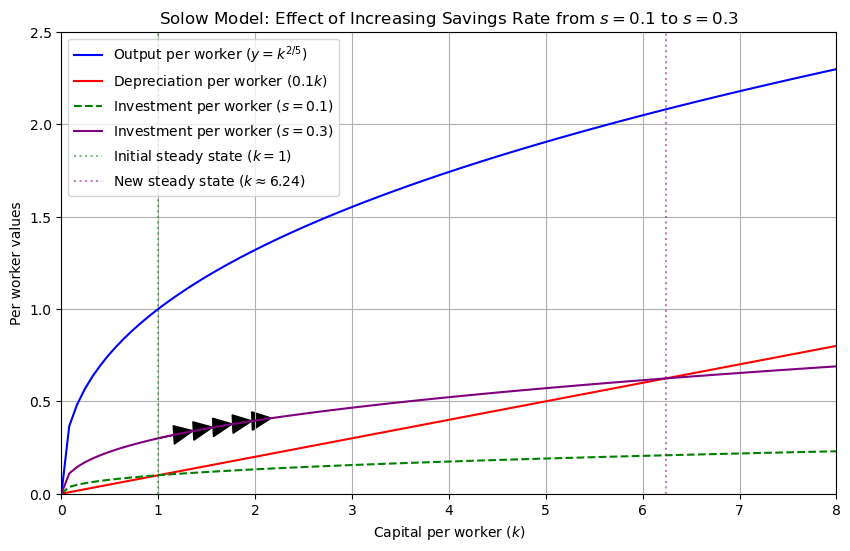

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2/5
delta = 0.1
s_initial = 0.1
s_new = 0.3

# Steady states
k_initial = (s_initial / delta) ** (5/3)  # 1
k_new = (s_new / delta) ** (5/3)         # 3^(5/3) ≈ 6.24

# Range of k values for plotting
k = np.linspace(0, 8, 100)

# Functions
y = k ** alpha                    # Output per worker: y = k^(2/5)
depreciation = delta * k          # Depreciation: δk = 0.1k
investment_initial = s_initial * y  # Initial investment: sy = 0.1 * k^(2/5)
investment_new = s_new * y        # New investment: sy = 0.3 * k^(2/5)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k, y, label='Output per worker ($y = k^{2/5}$)', color='blue')
plt.plot(k, depreciation, label='Depreciation per worker ($0.1k$)', color='red')
plt.plot(k, investment_initial, label='Investment per worker ($s = 0.1$)', color='green', linestyle='--')
plt.plot(k, investment_new, label='Investment per worker ($s = 0.3$)', color='purple')

# Mark steady states
plt.axvline(x=k_initial, color='green', linestyle=':', label='Initial steady state ($k = 1$)', alpha=0.5)
plt.axvline(x=k_new, color='purple', linestyle=':', label=f'New steady state ($k \\approx {k_new:.2f}$)', alpha=0.5)

# Dynamics: Show transition from k_initial to k_new
# We'll simulate a few steps to show the direction
k_values = [1]  # Start at initial steady state
for t in range(5):
    k_t = k_values[-1]
    y_t = k_t ** alpha
    k_next = k_t + s_new * y_t - delta * k_t
    k_values.append(k_next)

# Plot arrows to show dynamics
for i in range(len(k_values)-1):
    k_start = k_values[i]
    k_end = k_values[i+1]
    y_start = k_start ** alpha
    y_end = k_end ** alpha
    plt.arrow(k_start, s_new * y_start, (k_end - k_start) * 0.8, s_new * (y_end - y_start) * 0.8,
              head_width=0.1, head_length=0.2, fc='black', ec='black')

plt.xlabel('Capital per worker ($k$)')
plt.ylabel('Per worker values')
plt.title('Solow Model: Effect of Increasing Savings Rate from $s = 0.1$ to $s = 0.3$')
plt.legend()
plt.grid(True)
plt.ylim(0, 2.5)
plt.xlim(0, 8)
plt.show()